[[1.0, 0.067732], [1.0, 0.42781], [1.0, 0.995731], [1.0, 0.738336]]
[3.176513, 3.816464, 4.550095, 4.256571]
[[3.12259909]
 [1.48422734]]


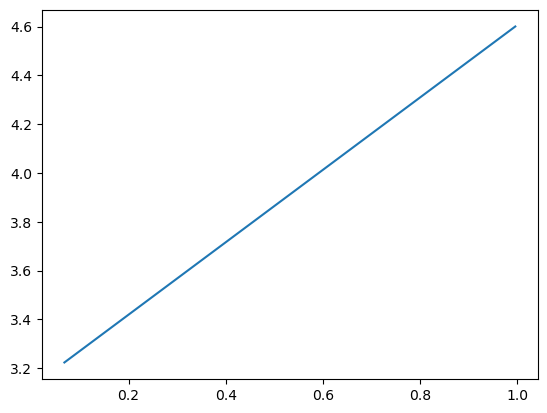

In [17]:
import numpy as np
import matplotlib.pylab as plt



def loadDataset(filename):
    """ 
    加载数据
        解析以tab键分隔的文件中的浮点数
    Returns: 
        dataMat :   feature 对应的数据集
        labelMat :  feature 对应的分类标签，即类别标签
    """
    # 获取样本特征的总数，不算目标变量
    fr = open(filename)
    numFeat = len(fr.readline().split('    ')) - 1
    dataMat = []
    labelMat = []
    for line in fr.readlines():
        # 读取每一行
        lineArr = []
        # 清空前后空白符号
        currLine = line.strip().split('    ')
        
        for i in range(numFeat):
            lineArr.append(float(currLine[i]))
        
        dataMat.append(lineArr)
        labelMat.append(float(currLine[-1]))

    return dataMat, labelMat


def standRegres(xArr, yArr):
    '''
    Description: 
        线性回归
    Args:
        xArr : 输入的样本数据，包含每个样本数据的 feature
        yArr : 对应于输入数据的类别标签，也就是每个样本对应的目标变量
    Returns:
        ws: 回归系数
    '''
    # mat()函数将xArr，yArr转换为矩阵 mat().T 代表的是对矩阵进行转置操作
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T

    xTx = xMat.T * xMat

    # 因为要用到xTx的逆矩阵，所以事先需要确定计算得到的xTx是否可逆，条件是矩阵的行列式不为0
    # linalg.det() 函数是用来求得矩阵的行列式的，如果矩阵的行列式为0，则这个矩阵是不可逆的，就无法进行接下来的运算  
    if np.linalg.det(xTx) == 0:
        print("This matrix is singular")
        return
    
    ws = xTx.I * (xMat.T * yMat)
    return ws


def regression1():
    xArr, yArr = loadDataset('data.txt')
    print(xArr)
    print(yArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    ws = standRegres(xArr, yArr)
    print(ws)
    # plt.scatter(xMat[:, 1], yMat.T[:, 0])

    xCopy = xMat.copy()
    xCopy.sort(0)
    yHat = xCopy * ws
    plt.plot(xCopy[:, 1], yHat)
    plt.show()

regression1()